In [280]:
# Import libraries

import sys
import os
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import NuSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,roc_curve,r2_score,mean_squared_error

In [281]:
# Load train dataset

df1=pd.read_csv("Train_Spion.csv")
df1.fillna(0)
df1.head()

,SPION,Core size (nm),M,r1,r2,KOW,KOA,MW,AMW,Sv,...,MLOGP2,ALOGP,ALOGP2,BLTF96,BLTD48,BLTA96,ALOGPS_logP,ALOGPS_logS,Category,Sub Category
0,PEG–2000-1 monUSPIO (Fe3O4),7.80,46.9\n,30.40,62.0,-1.36,4.25,62.08,6.21,4.82,...,1.11,-0.90,0.81,-0.49,-0.32,-0.18,-1.53,1.18,Ploymer,PEG
1,PЕG–2000-1 monUSPIO,7.90,46.6\n,30.1\n,107.0,-1.36,4.25,62.08,6.21,4.82,...,1.11,-0.90,0.81,-0.49,-0.32,-0.18,-1.53,1.18,Ploymer,PEG
2,PEG–2000-5monUSPIO,7.80,46.9\n,30.40,62.0,-2.30,10.21,238.32,6.27,19.65,...,1.42,-1.42,2.02,-0.38,-0.19,-0.04,-0.82,-1.18,Ploymer,PEG
3,PЕG–2000-1 monUSPIO,7. 7,50.2\n,31.9\n,74.0,-1.36,4.25,62.08,6.21,4.82,...,1.11,-0.90,0.81,-0.49,-0.32,-0.18,-1.53,1.18,Ploymer,PEG
4,PЕG–2000-3 monUSPIO,7. 7,50.2\n,31.9\n,74.0,-1.75,7.14,150.20,6.26,12.23,...,0.88,-1.16,1.34,-0.59,-0.43,-0.29,-1.12,0.35,Ploymer,PEG


In [282]:
# Only those descriptors are considered for training which have been found out using unsupervised learning

x_train=df1[['M','Core size (nm)','r1','r2','Xt','BLTF96','ALOGPS_logS','ALOGPS_logP','KOW','J','RBN','TI2','ICR','HNar','RBF','PJI2','S1K','AMR','MLOGP','BLI','MSD']]
#print(x_train.shape)
#print(x_train.head())

# Categorize the training dataset into x and y portions

x_train=np.array(x_train)
for i in range(x_train.shape[0]):
    for j in range(x_train.shape[1]):
        x_train[i][j]=str(x_train[i][j])

for i in range(x_train.shape[0]):
    for j in range(x_train.shape[1]):
        s,c='',0
        for k in range(len(x_train[i][j])):
            if x_train[i][j][k]=='1' or x_train[i][j][k]=='2' or x_train[i][j][k]=='3' or x_train[i][j][k]=='4' or x_train[i][j][k]=='5' or x_train[i][j][k]=='6' or x_train[i][j][k]=='7' or x_train[i][j][k]=='8' or x_train[i][j][k]=='9' or x_train[i][j][k]=='0' or x_train[i][j][k]=='.':
                s+=x_train[i][j][k]
                c+=1
        if c==0:
            s='0'
        s=float(s)
        #print("({},{}): {}".format(i,j,s))
        x_train[i][j]=s

'''for i in range(x_train.shape[0]):
    for j in range(x_train.shape[1]):
        print(type(x_train[i][j]))'''


y_train=df1['Category']
y_train=np.array(y_train)

y_train_sub=df1['Sub Category']
y_train_sub=np.array(y_train_sub)

label_encoder=LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
#print(y_train)

label_encoder=LabelEncoder()
y_train_sub=label_encoder.fit_transform(y_train_sub)
#print(y_train_sub)

# Categorize the training dataset into x and y portions for toxicity prediction

x_train_reg=df1[['M','Core size (nm)','r1','r2','KOW','KOA','ALOGP2','nC','MW','WA','Whete','Qindex','TI1','Wap']]

x_train_reg=np.array(x_train_reg)
for i in range(x_train_reg.shape[0]):
    for j in range(x_train_reg.shape[1]):
        x_train_reg[i][j]=str(x_train_reg[i][j])

for i in range(x_train_reg.shape[0]):
    for j in range(x_train_reg.shape[1]):
        s,c='',0
        for k in range(len(x_train_reg[i][j])):
            if x_train_reg[i][j][k]=='1' or x_train_reg[i][j][k]=='2' or x_train_reg[i][j][k]=='3' or x_train_reg[i][j][k]=='4' or x_train_reg[i][j][k]=='5' or x_train_reg[i][j][k]=='6' or x_train_reg[i][j][k]=='7' or x_train_reg[i][j][k]=='8' or x_train_reg[i][j][k]=='9' or x_train_reg[i][j][k]=='0' or x_train_reg[i][j][k]=='.':
                s+=x_train_reg[i][j][k]
                c+=1
        if c==0:
            s='0'
        s=float(s)
        #print("({},{}): {}".format(i,j,s))
        x_train_reg[i][j]=s

'''for i in range(x_train_reg.shape[0]):
    for j in range(x_train_reg.shape[1]):
        print(type(x_train_reg[i][j]))'''

train=df1[['BLTF96','BLTD48','BLTA96']]
train=np.array(train)

In [283]:
# Load the test dataset 

df2=pd.read_csv("Test_Spion.csv")
df2.fillna(0)
df2.head()

,SPION,Core size (nm),M,r1,r2,KOW,KOA,MW,AMW,Sv,...,MLOGP2,ALOGP,ALOGP2,BLTF96,BLTD48,BLTA96,ALOGPS_logP,ALOGPS_logS,Category,Sub Category
0,PEG–2000-3-monUSPIO (Fe3O4),7.8,46.9,30.4,62,-1.75,7.139,150.20,6.26,12.23,...,0.879,-1.159,1.344,-0.59,-0.43,-0.29,-1.12,0.35,Polymer,PEG
1,PЕG–2000-3 monUSPIO,7.9,46.6,30.1,107,-1.75,7.139,150.20,6.26,12.23,...,0.879,-1.159,1.344,-0.59,-0.43,-0.29,-1.12,0.35,Polymer,PEG
2,PЕG–2000-5 monUSPIO,7.9,46.6,30.1,107,-2.30,10.207,238.32,6.27,19.65,...,1.415,-1.421,2.019,-0.38,-0.19,-0.04,-0.82,-1.18,Polymer,PEG
3,PEG/PEI-5monSPIONs–PEI@PEG\n(200◦C),6.8,22.0,3.1,59,-2.30,10.207,238.32,6.27,19.65,...,1.415,-1.421,2.019,-0.38,-0.19,-0.04,-0.82,-1.18,Polymer,PEG
4,PEG/PEI-5 monSPIONs–PEI@PEG\n(260◦C),10,21.0,1.7,143,-2.30,10.207,238.32,6.27,19.65,...,1.415,-1.421,2.019,-0.38,-0.19,-0.04,-0.82,-1.18,Polymer,PEG


In [284]:
# Only those descriptors are considered for training which have been found out using unsupervised learning

x_test=df2[['M','Core size (nm)','r1','r2','Xt','BLTF96','ALOGPS_logS','ALOGPS_logP','KOW','J','RBN','TI2','ICR','HNar','RBF','PJI2','S1K','AMR','MLOGP','BLI','MSD']]
#print(x_test.shape)
#print(x_test.head())

# Categorize the training dataset into x and y portions

x_test=np.array(x_test)
for i in range(x_test.shape[0]):
    for j in range(x_test.shape[1]):
        x_test[i][j]=str(x_test[i][j])

for i in range(x_test.shape[0]):
    for j in range(x_test.shape[1]):
        s,c='',0
        for k in range(len(x_test[i][j])):
            if x_test[i][j][k]=='1' or x_test[i][j][k]=='2' or x_test[i][j][k]=='3' or x_test[i][j][k]=='4' or x_test[i][j][k]=='5' or x_test[i][j][k]=='6' or x_test[i][j][k]=='7' or x_test[i][j][k]=='8' or x_test[i][j][k]=='9' or x_test[i][j][k]=='0' or x_test[i][j][k]=='.':
                s+=x_test[i][j][k]
                c+=1
        if c==0:
            s='0'
        s=float(s)
        #print("({},{}): {}".format(i,j,s))
        x_test[i][j]=s

'''for i in range(x_test.shape[0]):
    for j in range(x_test.shape[1]):
        print(type(x_test[i][j]))'''


y_test=df2['Category']
y_test=np.array(y_test)

y_test_sub=df2['Sub Category']
y_test_sub=np.array(y_test_sub)

label_encoder=LabelEncoder()
y_test=label_encoder.fit_transform(y_test)
#print(y_test)

label_encoder=LabelEncoder()
y_test_sub=label_encoder.fit_transform(y_test_sub)
#print(y_test_sub)

name=df2['SPION']
name=np.array(name)
#print(name)

# Categorize the training dataset into x and y portions for toxicity prediction

x_test_reg=df2[['M','Core size (nm)','r1','r2','KOW','KOA','ALOGP2','nC','MW','WA','Whete','Qindex','TI1','Wap']]

x_test_reg=np.array(x_test_reg)
for i in range(x_test_reg.shape[0]):
    for j in range(x_test_reg.shape[1]):
        x_test_reg[i][j]=str(x_test_reg[i][j])

for i in range(x_test_reg.shape[0]):
    for j in range(x_test_reg.shape[1]):
        s,c='',0
        for k in range(len(x_test_reg[i][j])):
            if x_test_reg[i][j][k]=='1' or x_test_reg[i][j][k]=='2' or x_test_reg[i][j][k]=='3' or x_test_reg[i][j][k]=='4' or x_test_reg[i][j][k]=='5' or x_test_reg[i][j][k]=='6' or x_test_reg[i][j][k]=='7' or x_test_reg[i][j][k]=='8' or x_test_reg[i][j][k]=='9' or x_test_reg[i][j][k]=='0' or x_test_reg[i][j][k]=='.':
                s+=x_test_reg[i][j][k]
                c+=1
        if c==0:
            s='0'
        s=float(s)
        #print("({},{}): {}".format(i,j,s))
        x_test_reg[i][j]=s

'''for i in range(x_test_reg.shape[0]):
    for j in range(x_test_reg.shape[1]):
        print(type(x_test_reg[i][j]))'''

train=df1[['BLTF96','BLTD48','BLTA96']]
train=np.array(train)

K Nearest Neignbor Classifier
 
Classification of SPIONs having polymer or small molecule coating
 
F1 Score = 0.8640583554376657
Precision Score = 1.0
Recall Score = 0.7777777777777778


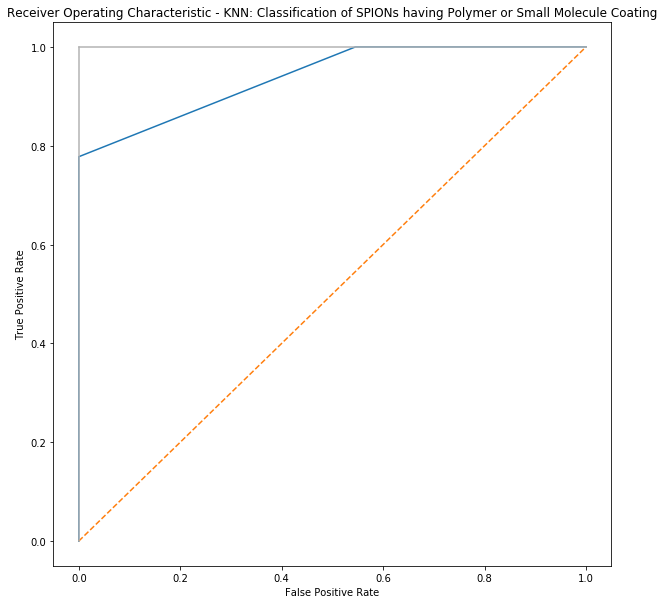

 
Classification of SPIONs having PEG, Chitosan/ Dextran, Hydrophilic, or Hydrophobic coating
 
F1 Score = 0.7085385878489326
Precision Score = 0.7827586206896552
Recall Score = 0.6896551724137931


In [285]:
# KNN Classifier

# SPION classification having polymer/ small molecule coating 

neigh=KNeighborsClassifier(n_neighbors=2,algorithm='kd_tree')
neigh.fit(x_train,y_train)
result_neigh=neigh.predict(x_test)
res1=result_neigh
#print(result_neigh)
#print(y_test)

print("K Nearest Neignbor Classifier")
print(" ")

print("Classification of SPIONs having polymer or small molecule coating")
print(" ")

f1=f1_score(y_test,result_neigh,average='weighted')
print("F1 Score = {}".format(f1))
ps=precision_score(y_test,result_neigh)
print("Precision Score = {}".format(ps))
rs=recall_score(y_test,result_neigh)
print("Recall Score = {}".format(rs))

y_score1=neigh.predict_proba(x_test)[:,1]
false_positive_rate1,true_positive_rate1,threshold1=roc_curve(y_test,y_score1)
plt.subplots(1,figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN: Classification of SPIONs having Polymer or Small Molecule Coating')
plt.plot(false_positive_rate1,true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    

# SPION sub classification having PEG, Chitosan/ Dextran, Hydrophobic, or Hydrophilic coating

print(" ")
print("Classification of SPIONs having PEG, Chitosan/ Dextran, Hydrophilic, or Hydrophobic coating")
print(" ")

neigh=KNeighborsClassifier(n_neighbors=2,algorithm='kd_tree')
neigh.fit(x_train,y_train_sub)
result_neigh=neigh.predict(x_test)
res2=result_neigh
#print(result_neigh)
#print(y_test)

f1=f1_score(y_test_sub,result_neigh,average='weighted')
print("F1 Score = {}".format(f1))
ps=precision_score(y_test_sub,result_neigh,average='weighted')
print("Precision Score = {}".format(ps))
rs=recall_score(y_test_sub,result_neigh,average='weighted')
print("Recall Score = {}".format(rs))

Nu Support Vector Classifier
 
Classification of SPIONs having polymer or small molecule coating
 
F1 Score = 0.9651622065415169
Precision Score = 0.9473684210526315
Recall Score = 1.0


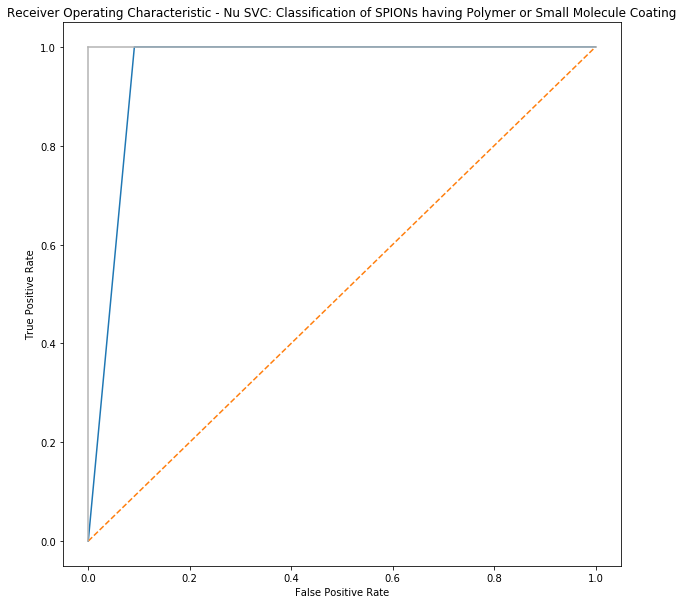

Random Forest Classifier
 
Classification of SPIONs having PEG, Chitosan/ Dextran, Hydrophilic, or Hydrophobic coating
 
F1 Score = 0.9298976885183782
Precision Score = 0.9359605911330049
Recall Score = 0.9310344827586207


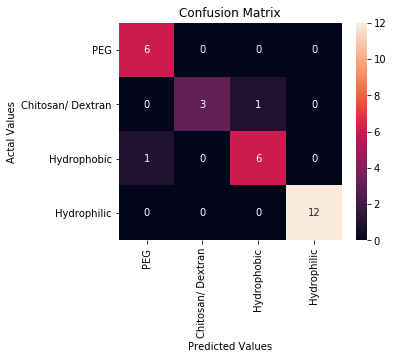

In [286]:
# NU Support Vector Classifier

# SPION classification having polymer/ small molecule coating 

clf=make_pipeline(StandardScaler(),NuSVC())
clf.fit(x_train,y_train)
result_clf=clf.predict(x_test)
res1=result_clf
#print(result_clf)
#print(y_test)

print("Nu Support Vector Classifier")
print(" ")

print("Classification of SPIONs having polymer or small molecule coating")
print(" ")

f1=f1_score(y_test,result_clf,average='weighted')
print("F1 Score = {}".format(f1))
ps=precision_score(y_test,result_clf)
print("Precision Score = {}".format(ps))
rs=recall_score(y_test,result_clf)
print("Recall Score = {}".format(rs))

y_score1=clf.predict(x_test)
false_positive_rate1,true_positive_rate1,threshold1=roc_curve(y_test,y_score1)
plt.subplots(1,figsize=(10,10))
plt.title('Receiver Operating Characteristic - Nu SVC: Classification of SPIONs having Polymer or Small Molecule Coating')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    

# SPION sub classification having PEG, Chitosan/ Dextran, Hydrophobic, or Hydrophilic coating

print("Random Forest Classifier")
print(" ")
print("Classification of SPIONs having PEG, Chitosan/ Dextran, Hydrophilic, or Hydrophobic coating")
print(" ")

clf=RandomForestClassifier(max_depth=4,random_state=0)
clf.fit(x_train,y_train_sub)
result_clf=clf.predict(x_test)
res2=result_clf
#print(result_clf)
#print(y_test)

f1=f1_score(y_test_sub,result_clf,average='weighted')
print("F1 Score = {}".format(f1))
ps=precision_score(y_test_sub,result_clf,average='weighted')
print("Precision Score = {}".format(ps))
rs=recall_score(y_test_sub,result_clf,average='weighted')
print("Recall Score = {}".format(rs))

cm=confusion_matrix(y_test_sub,res2)
cm_df=pd.DataFrame(cm,index=['PEG','Chitosan/ Dextran','Hydrophobic','Hydrophilic'],columns=['PEG','Chitosan/ Dextran','Hydrophobic','Hydrophilic'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [287]:
# Displaying SPION names along with their classification

for i in range(name.shape[0]):
    if res1[i]==1:
        cat='Polymer'
    else:
        cat='Small Molecule'
    if res2[i]==3:
        subcat='PEG'
    elif res2[i]==2:
        subcat='Chitosan/ Dextran'
    elif res2[i]==1:
        subcat='Hydrobhobic'
    else:
        subcat='Hydropjilic'
    print(" SPION {} has {} coating which is {} in nature".format(name[i],cat,subcat))

 SPION PEG–2000-3-monUSPIO (Fe3O4) has Polymer coating which is PEG in nature
 SPION PЕG–2000-3 monUSPIO has Polymer coating which is PEG in nature
 SPION PЕG–2000-5 monUSPIO has Polymer coating which is PEG in nature
 SPION PEG/PEI-5monSPIONs–PEI@PEG
(200◦C) has Polymer coating which is PEG in nature
 SPION PEG/PEI-5 monSPIONs–PEI@PEG
(260◦C) has Polymer coating which is PEG in nature
 SPION Phosphorylated mPEG-1(MnFe2O4) has Polymer coating which is PEG in nature
 SPION Phosphorylated mPEG-3(MnFe2O4)_ has Polymer coating which is PEG in nature
 SPION Phosphorylated mPEG-3 m (MnFe2O4)_U has Polymer coating which is PEG in nature
 SPION Phosphorylated mPEG-5 mon (MnFe2O4)_U has Polymer coating which is PEG in nature
 SPION Phosphorylated mPEG-5 monγ-Fe2O3 has Polymer coating which is PEG in nature
 SPION Chitosan – triphosphate-5 has Polymer coating which is Hydropjilic in nature
 SPION Cationic derivate of chitosan -CCh -5  has Polymer coating which is Hydropjilic in nature
 SPION SPI

In [288]:
# Toxicity Prediction using Ridge regression

print("Toxicity Prediction")
print(" ")

reg1=Ridge(alpha=0.05)
reg1.fit(x_train_reg,train)
res1=reg1.predict(x_test_reg)

print("R Squared Score = {}".format(r2_score(res1,test)))
print("Mean Squared Error = {}".format(mean_squared_error(res1,test)))

print(" ")
print("Comparing actual vs predicted toxicity values")
print(" ")

for i in range(res1.shape[0]):
    print("SPION: {}".format(name[i]))
    print(res1[i])
    print(test[i])
    print(" ")

Toxicity Prediction
 
R Squared Score = 0.8205664209444019
Mean Squared Error = 0.888761171727151
 
Comparing actual vs predicted toxicity values
 
SPION: PEG–2000-3-monUSPIO (Fe3O4)
[-0.57358107 -0.40901933 -0.27040725]
[-0.59 -0.43 -0.29]
 
SPION: PЕG–2000-3 monUSPIO
[-0.57603334 -0.41175758 -0.27329309]
[-0.59 -0.43 -0.29]
 
SPION: PЕG–2000-5 monUSPIO
[-0.56176088 -0.39465923 -0.25333202]
[-0.38 -0.19 -0.04]
 
SPION: PEG/PEI-5monSPIONs–PEI@PEG
(200◦C)
[-0.61851242 -0.45890663 -0.32006641]
[-0.38 -0.19 -0.04]
 
SPION: PEG/PEI-5 monSPIONs–PEI@PEG
(260◦C)
[-0.56537493 -0.39963934 -0.25774801]
[-0.38 -0.19 -0.04]
 
SPION: Phosphorylated mPEG-1(MnFe2O4)
[-0.4868656  -0.31671395 -0.17629435]
[-0.49 -0.32 -0.18]
 
SPION: Phosphorylated mPEG-3(MnFe2O4)_
[-0.4035362  -0.21940828 -0.07120136]
[-0.59 -0.43 -0.29]
 
SPION: Phosphorylated mPEG-3 m (MnFe2O4)_U
[-0.35411083 -0.16417287 -0.01316838]
[-0.59 -0.43 -0.29]
 
SPION: Phosphorylated mPEG-5 mon (MnFe2O4)_U
[-0.33985869 -0.14709721  0.00676